suneet paul singh

#MIST database of handwritten digits

In [31]:
import tensorflow as tf

70000 image  = 60000 -> train + 10000 -> test

In [32]:
tf.keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [33]:
data = tf.keras.datasets.mnist.load_data()


In [34]:
data[1]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [35]:
train_data = data[0]
test_data = data[1]


print(type(train_data))
print(len(test_data))

<class 'tuple'>
2


In [36]:
x_train = train_data[0]
y_train = train_data[1]

x_test = test_data[0]
y_test = test_data[1]

In [37]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
y_test.shape

(10000,)

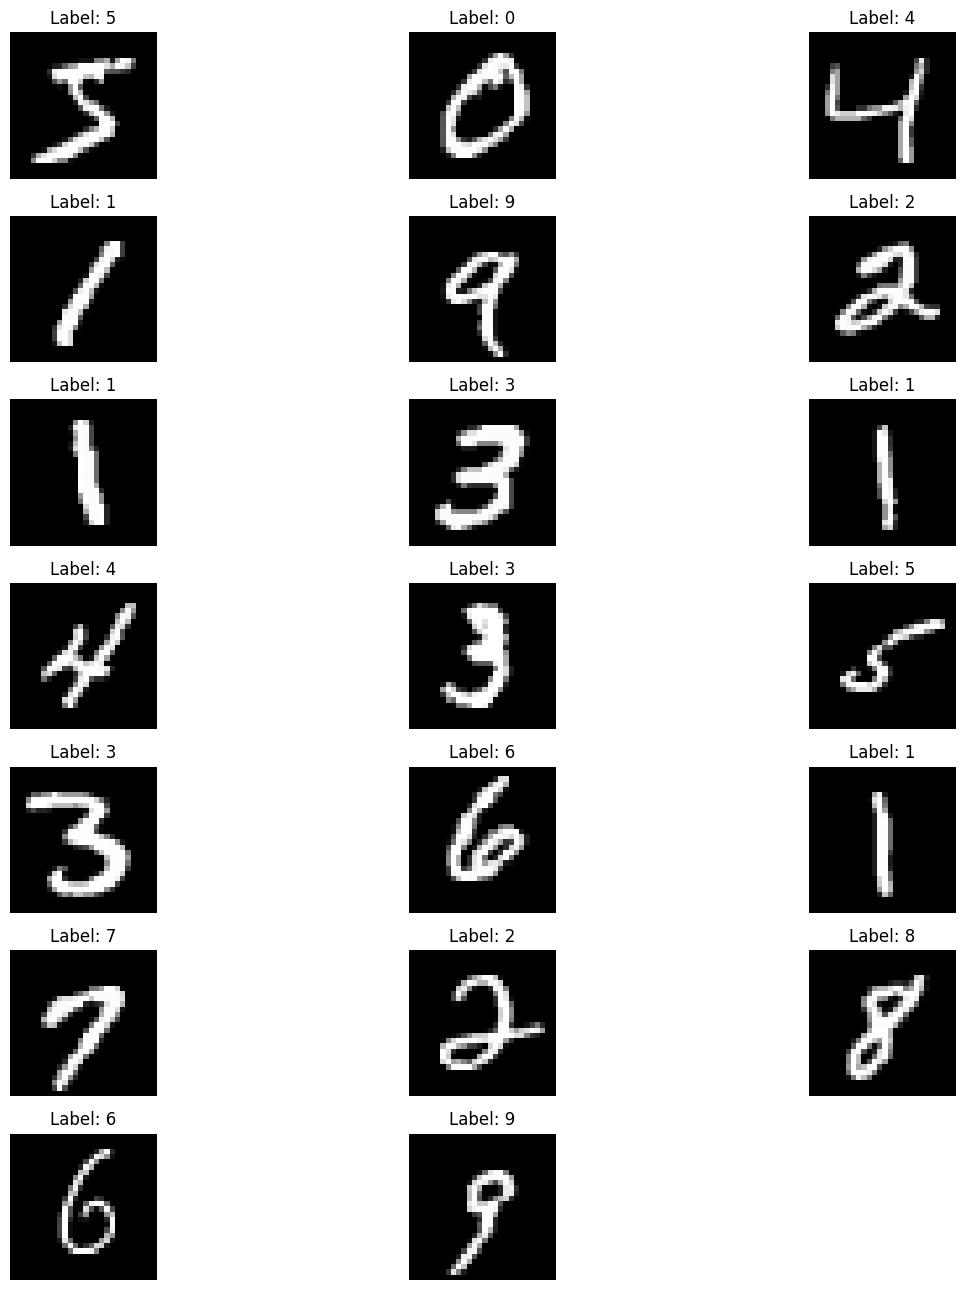

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))

for i in range(20):
    plt.subplot(7, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [41]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [42]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [43]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20,
          batch_size = x_train.shape[0])

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0644 - loss: 3.0400 - val_accuracy: 0.0869 - val_loss: 19.4271
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step - accuracy: 0.0754 - loss: 2.9411 - val_accuracy: 0.0986 - val_loss: 13.3619
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step - accuracy: 0.0887 - loss: 2.8462 - val_accuracy: 0.1118 - val_loss: 10.5365
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1023 - loss: 2.7552 - val_accuracy: 0.1278 - val_loss: 8.8043
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1199 - loss: 2.6681 - val_accuracy: 0.1426 - val_loss: 7.6031
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1393 - loss: 2.5850 - val_accuracy: 0.1608 - val_loss: 6.7087
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step - accuracy: 0.1607 - loss: 2.5057 - val_accuracy: 0.1773 - val_loss: 6.0112
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step - accuracy: 0.1837 - loss: 2.4303 - val_accuracy: 0.1942 - val_loss: 5.4491
E

In [46]:
y_pred = model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.24108896e-01, 1.27666327e-03, 3.15150508e-04, ...,
        8.69885921e-01, 2.70959339e-03, 1.46366470e-03],
       [1.33847422e-03, 6.27773406e-04, 3.07328370e-03, ...,
        9.92448568e-01, 1.72183195e-06, 2.95959253e-05],
       [6.82905642e-03, 8.81452799e-01, 1.59597453e-02, ...,
        4.50435542e-02, 1.44495722e-02, 5.45205455e-03],
       ...,
       [2.63915509e-02, 2.82907207e-03, 1.06988731e-03, ...,
        1.20860385e-02, 1.40956402e-01, 7.90093958e-01],
       [2.11355160e-03, 1.44739228e-03, 1.31047309e-05, ...,
        1.62346296e-05, 2.03443551e-06, 2.72797006e-05],
       [9.60161924e-01, 4.01830924e-08, 2.05282848e-02, ...,
        4.52139766e-08, 3.93826085e-05, 3.20429265e-08]], dtype=float32)

In [47]:
tf.argmax(y_pred)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([5768, 4236, 1805, 2850, 7709,  402, 4357, 1393, 4968, 9793])>

In [49]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3809 - loss: 2.5780
Test Accuracy: 0.39320001006126404
